# Quantum Computing Workshop for Deep Learning Indaba Exercise 2

**Bloch Sphere & Beyond: Interactive Visualizations with Qiskit**

This execrise 2 notebook is designed for the Deep Learning IndabaX workshop. It provides hands‑on widgets to build intuition for quantum bits (qubits), quantum gates, entanglement, and a taste of quantum machine learning.

## 1. Classical Bits vs Quantum Bits

* **Classical bit**: Either `0` or `1`.
* **Quantum bit (qubit)**: A unit vector in a 2‑D complex Hilbert space $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ where $|\alpha|^2 + |\beta|^2 = 1$.
* **Bloch sphere**: Geometric representation of a single qubit using spherical coordinates $(\theta,\;\phi)$:

$$|\psi\rangle = \cos\tfrac{\theta}{2}|0\rangle + e^{i\phi}\sin\tfrac{\theta}{2}|1\rangle$$

Changing $\theta$ moves the state between north and south poles (superposition). Changing $\phi$ rotates around the vertical axis (phase).

Changing $\theta$ moves the state between the poles (controls **superposition**). Changing $\phi$ spins the state around the vertical axis (controls **phase**).

In [1]:
import sys, subprocess, pkg_resources, importlib.util, json, types, os, pathlib, warnings
def _pip_install(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    except subprocess.CalledProcessError as e:
        print(f"⚠️ pip install failed for {package}: {e}")
try:
    import qiskit
    v = qiskit.__version__
    print("✅ Qiskit already installed:", v)
except ImportError:
    print("Installing Qiskit...")
    _pip_install('qiskit[visualization,aer]==1.*')
# ipywidgets for interactivity
try:
    import ipywidgets as widgets
except ImportError:
    print("Installing ipywidgets...")
    _pip_install('ipywidgets')


/var/folders/vw/pw_738611cg5z6sj7sj8vd_r0000gn/T/ipykernel_93538/761971570.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import sys, subprocess, pkg_resources, importlib.util, json, types, os, pathlib, warnings


✅ Qiskit already installed: 2.1.0


In [2]:
# Static inline PNGs (good for simple demos)
%matplotlib inline

# Fully interactive 3D rotation/zoom (requires ipympl)
%matplotlib widget


In [3]:

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np, matplotlib.pyplot as plt
from IPython.display import display  # optional fallback

@widgets.interact(theta=(0,180,1), phi=(0,360,1))
def show_bloch(theta, phi):
    α = np.cos(np.deg2rad(theta)/2)
    β = np.exp(1j*np.deg2rad(phi))*np.sin(np.deg2rad(theta)/2)
    state = Statevector([α, β])
    fig = plot_bloch_multivector(state, figsize=(4,4))
    # Either:
    plt.show()
    # —or if that still warns:
    # display(fig)


interactive(children=(IntSlider(value=90, description='theta', max=180), IntSlider(value=180, description='phi…

TypeError: QuantumCircuit.measure() missing 1 required positional argument: 'cbit'

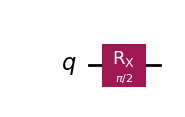

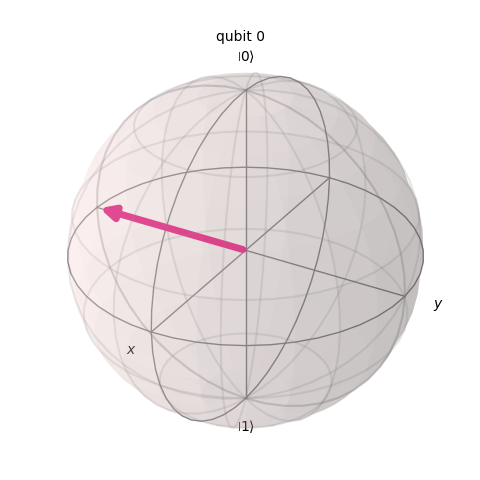

In [15]:
qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)
qc.draw('mpl')
plot_bloch_multivector(qc)

qc.measure(0)
qc.draw('mpl')
plot_bloch_multivector(qc)

ToggleButtons(description='Classical bit:', options=(('0 (Off)', 0), ('1 (On)', 1)), value=0)

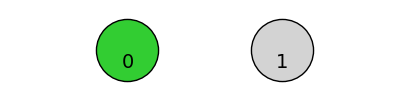

In [ ]:
# ── Classical Bit Explorer ───────────────────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_bit(bit):
    fig, ax = plt.subplots(figsize=(4, 1))
    # turn off axes
    ax.axis('off')
    # positions for 0 and 1
    xs = [0, 1]
    ys = [0, 0]
    # color the “on” state green, the other grey
    colors = ['lightgray', 'lightgray']
    colors[bit] = 'limegreen'
    ax.scatter(xs, ys, s=2000, c=colors, edgecolors='black')
    # labels
    ax.text(0, -0.3, '0', ha='center', va='center', fontsize=14)
    ax.text(1, -0.3, '1', ha='center', va='center', fontsize=14)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-1, 1)
    plt.show()

bit_widget = widgets.ToggleButtons(
    options=[('0 (Off)', 0), ('1 (On)', 1)],
    description='Classical bit:'
)

def on_change(change):
    if change['name'] == 'value':
        clear_output(wait=True)
        display(bit_widget)
        plot_bit(change['new'])

bit_widget.observe(on_change)
display(bit_widget)
plot_bit(bit_widget.value)


In [ ]:
# ── Gate Explorer: Apply & Visualize ───────────────────────────────────────
# Make sure you’ve activated a notebook backend up top:
#    %matplotlib inline   (or %matplotlib widget for 3D interactivity)

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Interactive widget
@widgets.interact(
    gate=widgets.Dropdown(
        options=['X','Y','Z','H','S','T','Rx','Ry','Rz'],
        description='Gate:'
    ),
    angle=widgets.FloatSlider(
        value=90, min=0, max=360, step=1,
        description='Angle (°)'
    )
)
def apply_and_plot(gate, angle):
    # 1) Build a 1-qubit circuit starting in |0>
    qc = QuantumCircuit(1)
    
    # 2) Apply the chosen gate
    if gate in ('Rx','Ry','Rz'):
        θ = np.deg2rad(angle)
        getattr(qc, gate.lower())(θ, 0)  # e.g. qc.rx(θ,0)
    else:
        getattr(qc, gate.lower())(0)     # e.g. qc.x(0), qc.h(0), qc.s(0), qc.t(0)
    
    # 3) Get the resulting statevector
    state = Statevector.from_instruction(qc)
    
    # 4) Plot on the Bloch sphere
    fig = plot_bloch_multivector(state, figsize=(4,4))
    plt.show()


interactive(children=(Dropdown(description='Gate:', options=('X', 'Y', 'Z', 'H', 'S', 'T', 'Rx', 'Ry', 'Rz'), …

In [ ]:
# ── 1) Randomness Explorer ───────────────────────────────────────
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import ipywidgets as widgets
import matplotlib.pyplot as plt

backend = AerSimulator()

@widgets.interact(shots=(10, 2000, 10))
def measure_hadamard(shots):
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.measure(0, 0)
    # run via backend.run()
    job = backend.run(transpile(qc, backend), shots=shots)
    counts = job.result().get_counts()
    plot_histogram(counts, figsize=(4,3), title=f"{shots} shots")
    plt.show()


interactive(children=(IntSlider(value=1000, description='shots', max=2000, min=10, step=10), Output()), _dom_c…